# Prueba t `t.test`
- Rogelio Medina
- Juan Orellana

In [18]:
data <- read.table(file = "prom_periodos_climaticos.txt",
                   header = TRUE,
                   sep = "|")

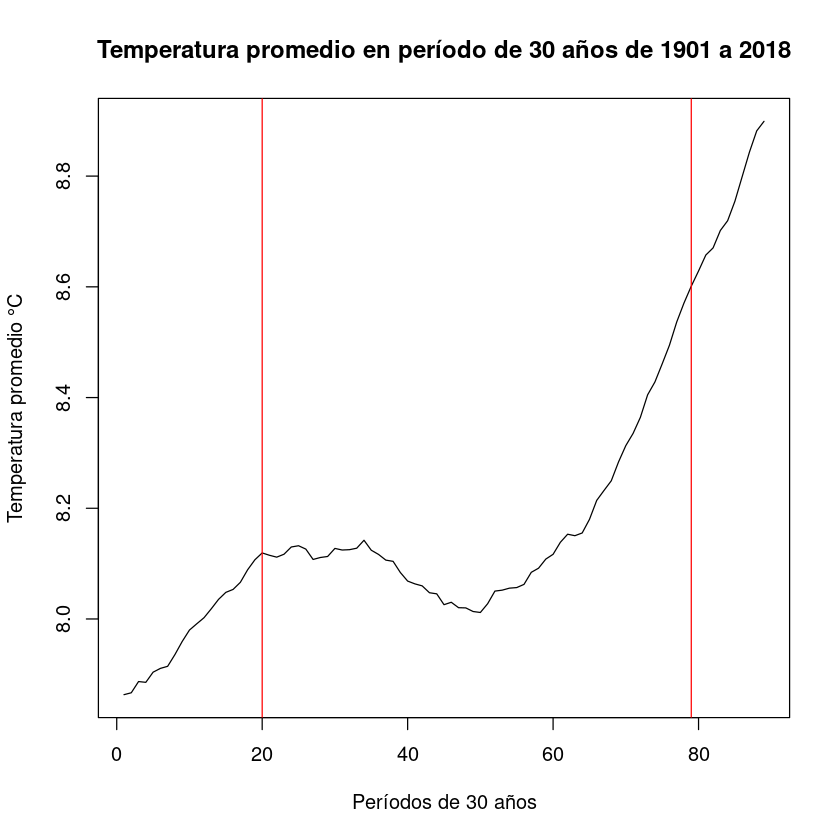

In [19]:
plot(data$Promedio, type = "l",
  xlab = "Períodos de 30 años",
  ylab = "Temperatura promedio °C"
)
title("Temperatura promedio en período de 30 años de 1901 a 2018")
abline(v = 20, col = "red")
abline(v = 79, col = "red")

La temperatura promedio anual de los primeros 20 períodos es 0.5 °C menor que en los ultimos 20 períodos

$H_0: \mu_{d} < 0.5$\
$H_A: \mu_{d}  \geq 0.5$\
$\alpha = 0.05$

In [20]:
per1 <- paste(data[1:20, ]$Inicio, data[1:20, ]$Fin, sep = "-")
per2 <- paste(data[(nrow(data) - 19):nrow(data), ]$Inicio,
              data[(nrow(data) - 19):nrow(data), ]$Fin, sep = "-")

In [21]:
tabla <- data.frame(
  N = 1:20,
  periodo = paste(per1, ",", per2),
  antes = data[1:20, ]$Promedio,
  despues = data[(nrow(data) - 19):nrow(data), ]$Promedio
)

tabla$d <- tabla$despues - tabla$antes

head(tabla)

,N,periodo,antes,despues,d
,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,1,"1901-1930 , 1970-1999",7.863297,8.313213,0.4499159
2,2,"1902-1931 , 1971-2000",7.866712,8.335230,0.4685183
3,3,"1903-1932 , 1972-2001",7.886981,8.364175,0.4771938
4,4,"1904-1933 , 1973-2002",7.885575,8.404977,0.5194020
5,5,"1905-1934 , 1974-2003",7.903933,8.428117,0.5241842
6,6,"1906-1935 , 1975-2004",7.910742,8.460845,0.5501027


In [22]:
d <- tabla$d
s2 <- var(d)
n <- length(d)
df <- n - 1
d_bar <- mean(d)
s_dbar <- sd(d) / sqrt(n)

In [23]:
t <- (d_bar - 0.5) / s_dbar
t

[1] 5.391567

In [24]:
tc <- qt(0.95, df)
tc

[1] 1.729133

In [25]:
t > tc

[1] TRUE

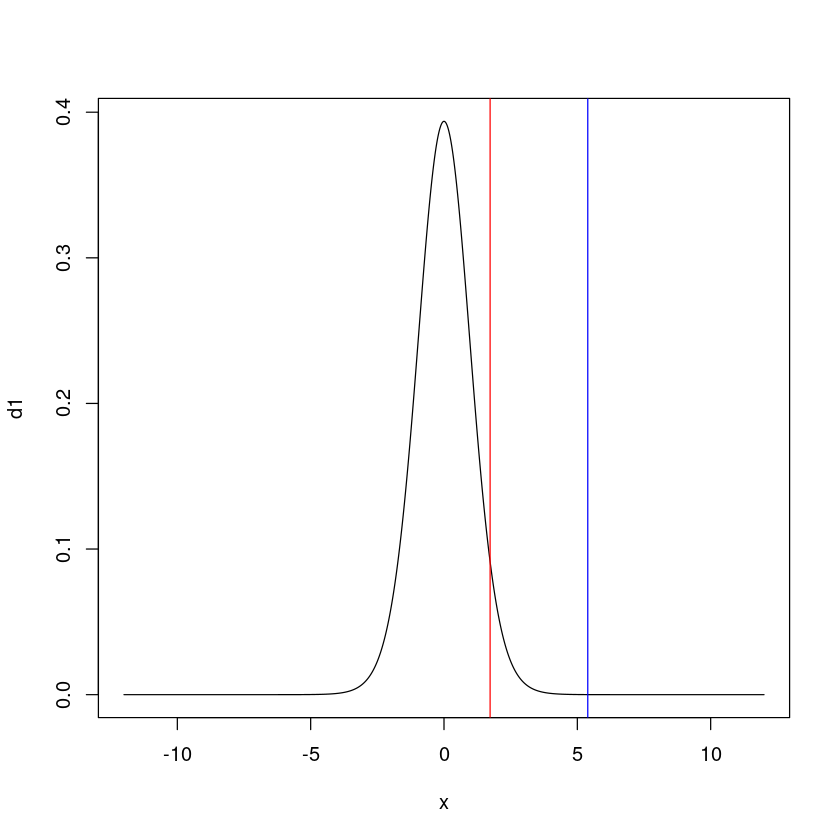

In [26]:
x <- seq(-12, 12, 0.01)
d1 <- dt(x, df = df)

plot(x, d1, t = "l")

# t0.05(2)340
abline(v = tc, col = "red")
abline(v = t, col = "blue")

In [30]:
t.test(tabla$despues, tabla$antes,
       paired = F, alternative = "greater",
       mu = 0.5)


	Welch Two Sample t-test

data:  tabla$despues and tabla$antes
t = 2.7017, df = 26.523, p-value = 0.005936
alternative hypothesis: true difference in means is greater than 0.5
95 percent confidence interval:
 0.5448126       Inf
sample estimates:
mean of x mean of y 
 8.603252  7.981858 
